# Assignment 4

## 1. Global Earthquakes

In [1]:
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.ticker as mticker
%matplotlib inline
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from __future__ import unicode_literals

In [2]:
#read the csv file 
df = pd.read_csv('usgs_earthquakes.csv')
arr_lon=df[df['mag']>=6.5]['longitude'].values
arr_lat=df[df['mag']>=6.5]['latitude'].values
arr_mag=df[df['mag']>=6.5]['mag'].values

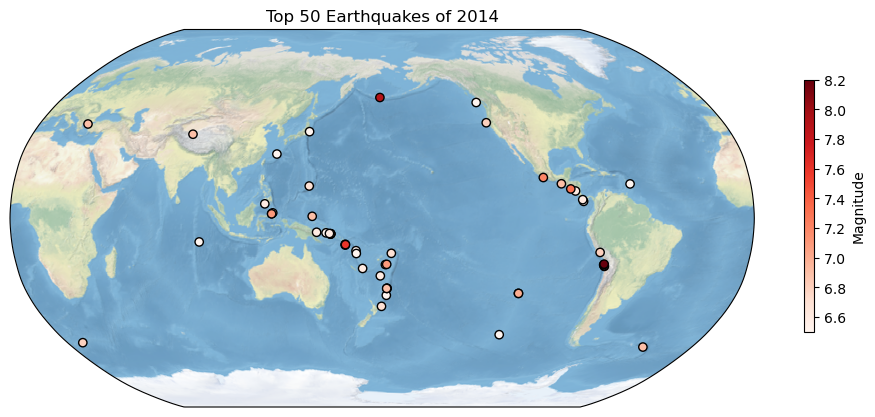

In [3]:
# set figure 
fig = plt.figure(figsize=(10, 5),dpi=100)
ax = fig.add_subplot(projection=ccrs.Robinson(central_longitude = 180))
ax.set_global()
ax.stock_img()
ax.set_title('Top 50 Earthquakes of 2014')
ax.scatter(arr_lon,arr_lat,c=arr_mag ,transform=ccrs.PlateCarree(),vmin=6.5, vmax=8.2, cmap='Reds',
           marker='o',edgecolors='k')
# add colorbar into figure
pos = ax.get_position()
cax = fig.add_axes([pos.xmax+0.05, pos.ymin+0.15,0.01,(pos.ymax-pos.ymin-0.25)])
cbar = mpl.colorbar.ColorbarBase(cax,cmap=plt.cm.get_cmap('Reds'),norm=mpl.colors.Normalize(6.5,8.2),
                                 ticks=list(np.linspace(6.6, 8.2, 9)),orientation='vertical')
cbar.ax.set_ylabel('Magnitude')
plt.show()

## 2. Explore a netCDF dataset

### 2.1 [10 points] Make a global map of a certain variable. Your figure should contain: a project, x label and ticks, y label and ticks, title, gridlines, legend, colorbar, masks or features, annotations, and text box (1 point each).

In [4]:
ds=xr.open_dataset('air.sig995.2012.nc')

/Users/gong/opt/anaconda3/lib/python3.8/site-packages/xarray/coding/times.py:117: SerializationWarning: Ambiguous reference date string: 1-1-1 00:00:0.0. The first value is assumed to be the year hence will be padded with zeros to remove the ambiguity (the padded reference date string is: 0001-1-1 00:00:0.0). To remove this message, remove the ambiguity by padding your reference date strings with zeros.
  warnings.warn(warning_msg, SerializationWarning)


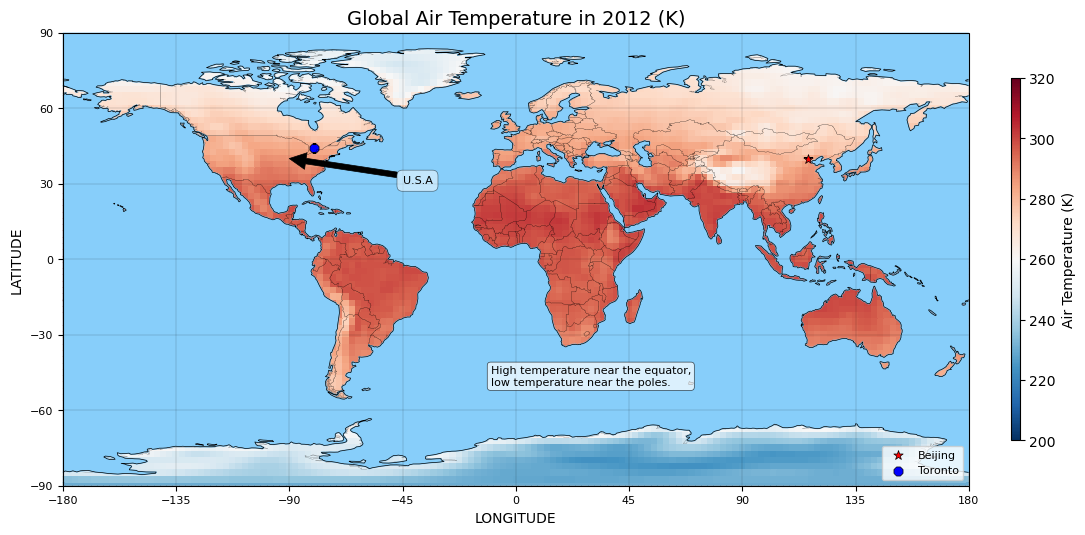

In [5]:
plt.figure(figsize=(18,6),dpi=100)
ax = plt.axes(projection=ccrs.PlateCarree())
# project and feature
ax.add_feature(cfeature.NaturalEarthFeature(category='cultural',
                                           name='admin_0_countries',
                                           scale='50m',
                                           facecolor='none',
                                           edgecolor='black',
                                           linewidth=0.1))
# plot figure and colorbar
ds.air.mean('time').plot(transform=ccrs.PlateCarree(),zorder=0,cmap='RdBu_r',vmin=200,vmax=320,add_colorbar=True,
                         cbar_kwargs={'shrink':0.8,'pad':0.03,'aspect':40,'label':'Air Temperature (K)'})
# Add gridlines 
gl = ax.gridlines(crs=ccrs.PlateCarree(), linewidth=0.1, color='black', alpha=1)
gl.ylocator = mticker.FixedLocator(np.arange(-90,90,30))
gl.xlocator = mticker.FixedLocator(np.arange(-180, 180, 45))
# masks or feature
ax.add_feature(cfeature.OCEAN, facecolor='lightskyblue',zorder=1)
ax.add_feature(cfeature.COASTLINE,linewidth=0.5,zorder=2)
# x label and tick
ax.tick_params(labelsize=8)
ax.set_xticks(np.linspace(-180, 180, 9))
ax.set_xlabel('LONGITUDE',fontsize=10)
# y label and tick
ax.set_yticks(np.linspace(-90, 90, 7))
ax.set_ylabel('LATITUDE',fontsize=10)
# annotate
ax.annotate('U.S.A',xy=(-90,40),xytext=(-45,30),fontsize=8,arrowprops=dict(lw=0.5,color='k'),
             bbox=dict(boxstyle='round,pad=0.5', fc='white', ec='black',lw=0.5 ,alpha=0.5))
# legend
ax.scatter(116,40,s=50,c='r',marker='*',label='Beijing',edgecolors='k', linewidths=0.5)
ax.scatter(-80,44,s=50,c='b',marker='8',label='Toronto',edgecolors='k', linewidths=0.5)
ax.legend(loc='lower right',fontsize=8)
# text box
ax.text(-10,-50,'High temperature near the equator,\nlow temperature near the poles.',
         fontsize=8,bbox=dict(boxstyle='round,pad=0.3', fc='white', ec='black',lw=0.5 ,alpha=0.7))
# title
ax.set_title("Global Air Temperature in 2012 (K)",fontsize=14)

plt.show()

### 2.2 [10 points] Make a regional map of the same variable. Your figure should contain: a different project, x label and ticks, y label and ticks, title, gridlines, legend, colorbar, masks or features, annotations, and text box (1 point each).

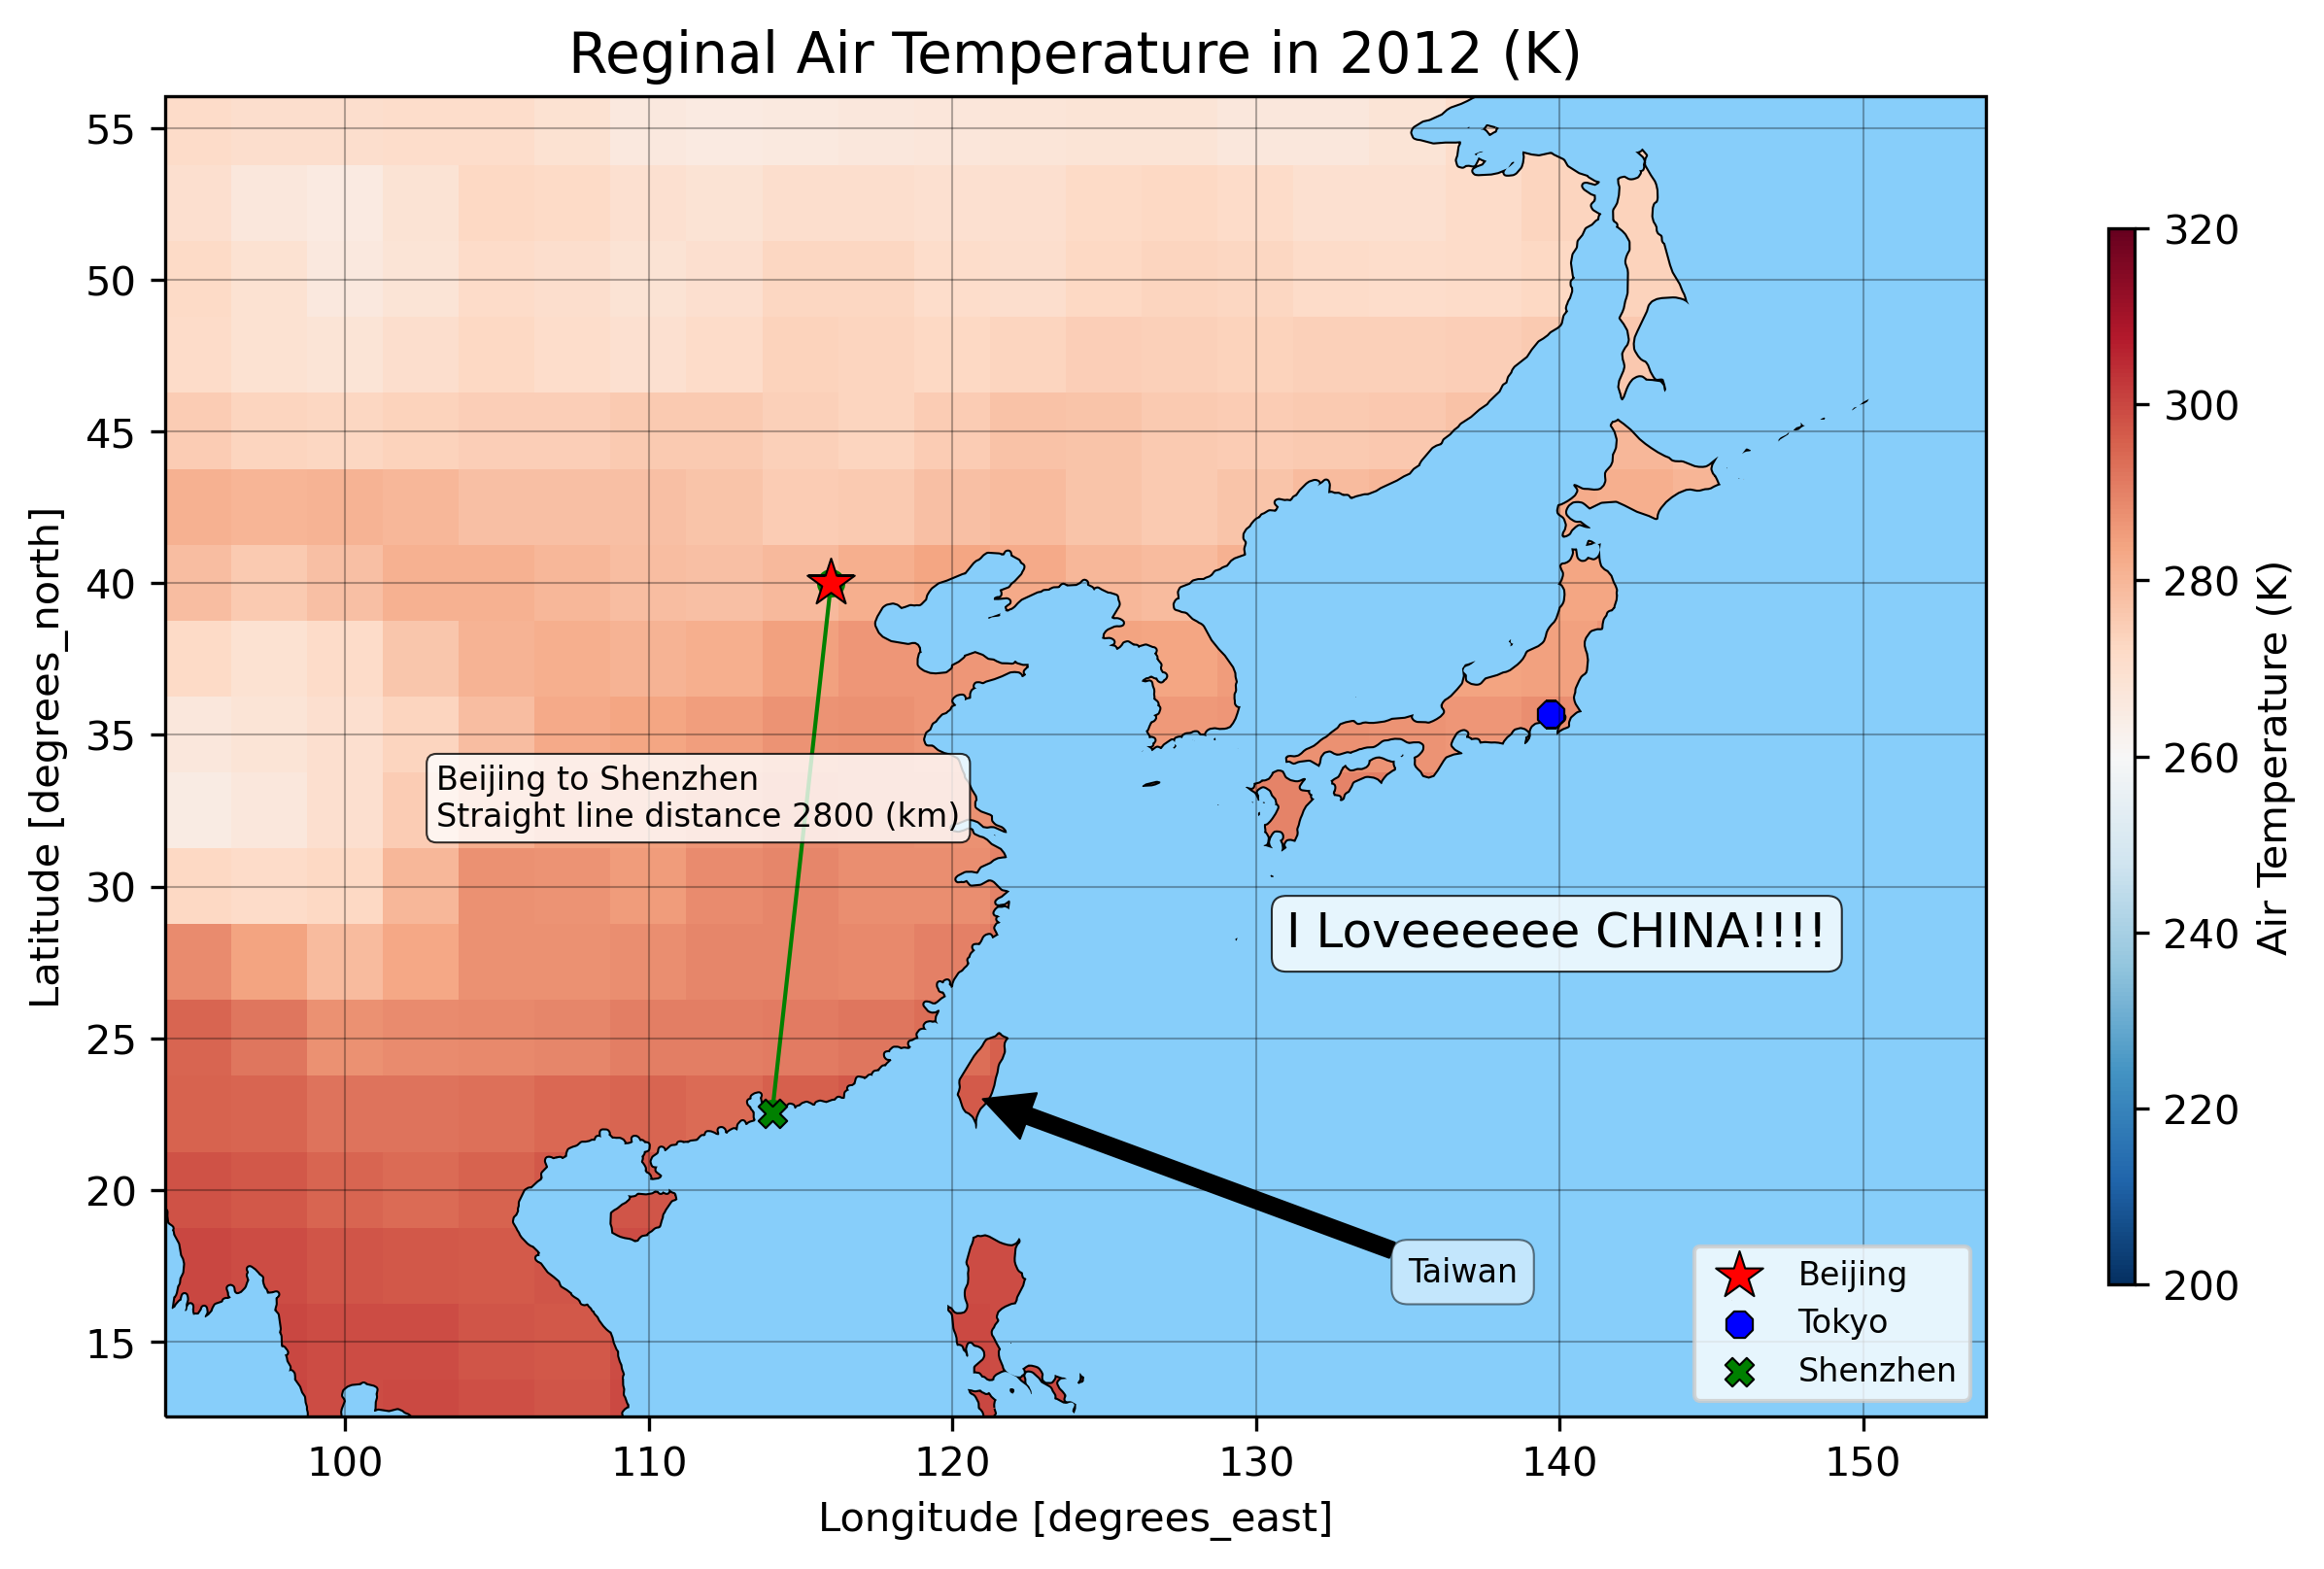

In [6]:
# Create and define the size of a figure object 
plt.figure(figsize=(18,6), dpi=300)
shenzhen_lon, shenzhen_lat = 114.06, 22.54 # Shenzhen

# project
proj = ccrs.PlateCarree() 
ax = plt.axes(projection=proj)
ax.gridlines(crs=ccrs.PlateCarree(),xlocs=list(np.linspace(-180,180,37)),ylocs=list(np.linspace(-90,90,37)),
                  linewidth=0.5, color='black', alpha=0.3,zorder=3)

# x label and tick
ax.set_xticks(np.linspace(-180, 180, 37))
ax.set_xlabel('Longitude [degree_east]',fontsize=10)
# y label and tick
ax.set_yticks(np.linspace(-90,90, 37))
ax.set_xlabel('latitude [degree_north]',fontsize=10)

# plot air temperature and colorbar
ds.air.mean('time').plot(transform=ccrs.PlateCarree(),zorder=0,cmap='RdBu_r',vmin=200,vmax=320,
            add_colorbar=True,cbar_kwargs={'shrink':0.8,'pad':0.03,'aspect':40,'label':'Air Temperature (K)'})

# set extent area
extent = [shenzhen_lon-20, shenzhen_lon+40, shenzhen_lat-10, shenzhen_lat+30]
ax.set_extent(extent)

# feature and mask
ax.add_feature(cfeature.OCEAN, facecolor='lightskyblue', zorder=2)
ax.add_feature(cfeature.COASTLINE,facecolor='none', edgecolor='k', linewidth=2)

# annotate
ax.annotate('Taiwan',xy=(121,23),xytext=(135,17),fontsize=8,arrowprops=dict(lw=0.5,color='k'),
             bbox=dict(boxstyle='round,pad=0.5', fc='white', ec='black',lw=0.5 ,alpha=0.5))

# legend
ax.scatter(116,40,s=150,c='r',marker='*',label='Beijing',edgecolors='k', linewidths=0.5,zorder=5)
ax.scatter(139.69,35.69,s=50,c='b',marker='8',label='Tokyo',edgecolors='k', linewidths=0.5,zorder=3)
ax.scatter(114.06,22.54,s=50,c='g',marker='X',label='Shenzhen',edgecolors='k', linewidths=0.5,zorder=4)
ax.legend(loc='lower right',fontsize=8)

# text box
ax.text(131,28,'I Loveeeeee CHINA!!!!',c='k',fontsize=12,
        bbox=dict(boxstyle='round,pad=0.3', fc='white', ec='black',lw=0.5 ,alpha=0.8))
ax.text(103,32,'Beijing to Shenzhen\nStraight line distance 2800 (km)',c='k',fontsize=8,
        bbox=dict(boxstyle='round,pad=0.3', fc='white', ec='black',lw=0.5 ,alpha=0.8))
# title
ax.set_title("Reginal Air Temperature in 2012 (K)",fontsize=14)

# furether more
Shenzhen = dict(lon=114.06, lat=22.54)
Beijing = dict(lon=116, lat=40)
lons = [Shenzhen['lon'], Beijing['lon']]
lats = [Shenzhen['lat'], Beijing['lat']]
ax.plot(lons, lats, 'go-',lw=1, transform=ccrs.PlateCarree())

plt.show()